In [1]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#path = "C:/Users/bilge/Desktop/cats/*.jpg"
path = "./cats/*.jpg"
orange_path = "./orange.jpg"
orangedkitty_path = "./orangedkitties/"
orangedkitty_random_path = "./orangedkitties_random/"
weights_path = "./weights.dat"


There are 12500 cat images 



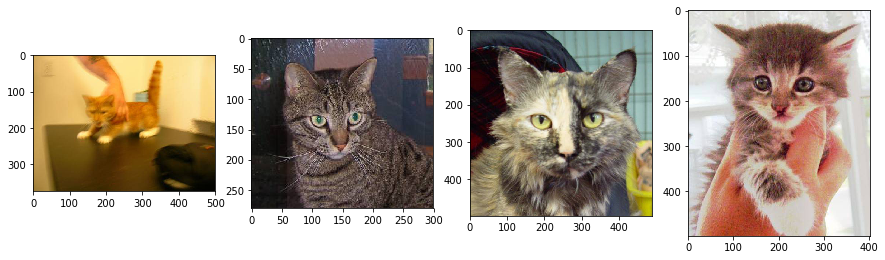

In [2]:
cat_img_paths = glob.glob(path)

print("\nThere are %s cat images \n" % len(cat_img_paths))

cat0 = cv2.imread(cat_img_paths[0])
cat1 = cv2.imread(cat_img_paths[1])
cat2 = cv2.imread(cat_img_paths[2])
cat3 = cv2.imread(cat_img_paths[3])

f, axarr = plt.subplots(1,4)
f.set_size_inches(15, 10)
axarr[0].imshow(cv2.cvtColor(cat0, cv2.COLOR_BGR2RGB))
axarr[1].imshow(cv2.cvtColor(cat1, cv2.COLOR_BGR2RGB))
axarr[2].imshow(cv2.cvtColor(cat2, cv2.COLOR_BGR2RGB))
axarr[3].imshow(cv2.cvtColor(cat3, cv2.COLOR_BGR2RGB))

plt.show()


The orange image is an orange with black background 



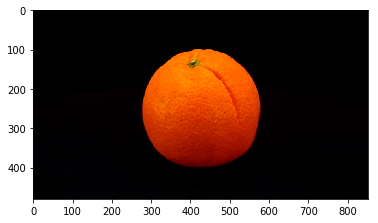

In [3]:
print("\nThe orange image is an orange with black background \n")

orange = cv2.imread(orange_path)

plt.imshow(cv2.cvtColor(orange, cv2.COLOR_BGR2RGB))
plt.show()

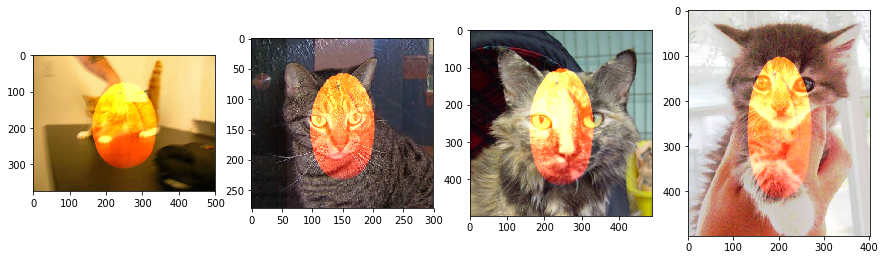

In [4]:
"""
We want to add orange image to the cat images in order to create 
training samples, where we can try to decompose them later on.

There is a difference between OpenCV addition and Numpy addition.
OpenCV addition is a saturated operation while Numpy addition is a modulo operation.

cv2.add => 250+10 = 260 => 255
np.add (_ + _) => 250+10 = 260 % 256 = 4

"""

# Reshape the orange img
# Add orange to the cat images
orange_resized0 = cv2.resize(orange, dsize=(cat0.shape[1], cat0.shape[0]), interpolation=cv2.INTER_CUBIC)
oranged_kitty0 = cv2.add(orange_resized0, cat0)
orange_resized1 = cv2.resize(orange, dsize=(cat1.shape[1], cat1.shape[0]), interpolation=cv2.INTER_CUBIC)
oranged_kitty1 = cv2.add(orange_resized1, cat1)
orange_resized2 = cv2.resize(orange, dsize=(cat2.shape[1], cat2.shape[0]), interpolation=cv2.INTER_CUBIC)
oranged_kitty2 = cv2.add(orange_resized2, cat2)
orange_resized3 = cv2.resize(orange, dsize=(cat3.shape[1], cat3.shape[0]), interpolation=cv2.INTER_CUBIC)
oranged_kitty3 = cv2.add(orange_resized3, cat3)

f, axarr = plt.subplots(1,4)
f.set_size_inches(15, 10)
axarr[0].imshow(cv2.cvtColor(oranged_kitty0, cv2.COLOR_BGR2RGB))
axarr[1].imshow(cv2.cvtColor(oranged_kitty1, cv2.COLOR_BGR2RGB))
axarr[2].imshow(cv2.cvtColor(oranged_kitty2, cv2.COLOR_BGR2RGB))
axarr[3].imshow(cv2.cvtColor(oranged_kitty3, cv2.COLOR_BGR2RGB))

plt.show()

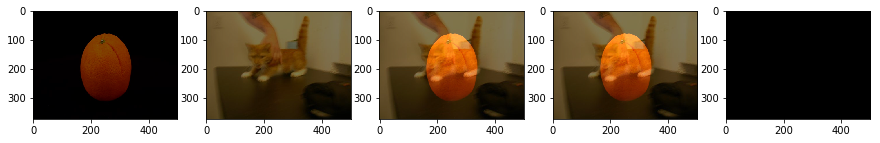

In [5]:
"""
Since we are going to use these oranged kitty images for training our network,
we also need to test whether the decomposed images are correct or not.

We need the original cat and orange images to be present, so we can compare the
decomposed images with them, but there is a problem, what happens if the added 
values of a pixel is more than 255? Since cv2.add just ignores the extra part
and sets the value to 255 (250+10 = 260 => 255)?

In order to solve this problem, we can use weighted sum (a.k.a image blending)
and set the weights of both cat and orange to 0.5.

This way, even if the values of pixels in both cat and orange image are max (255),
the maximum value we will get still will be 255. But this time, we just need to 
compare the decomposed images to the 0.5 of the original images values.

!! Important: 
The question I am not sure about is, will this operation affect the model accuracy
of our network, since we assume that both layers of images have the same weight in
the input image, which might not be the case for our original problem.
"""

# Resize the orange img
orange_resized0 = cv2.resize(orange, dsize=(cat0.shape[1], cat0.shape[0]), interpolation=cv2.INTER_CUBIC)

# Multiply orange and cat image with 0.5
orange_weighted = orange_resized0 * 0.5
kitty_weighted = cat0 * 0.5

# Add weighted images so we can compare it directly with the weighted sum of both images
added = np.round(orange_weighted + kitty_weighted).astype('uint8')

# Calculate the weighted sum
weighted = cv2.addWeighted(orange_resized0, 0.5, cat0, 0.5, 0)

# Calculate the difference
diff = (added - weighted).astype('uint8')

f, axarr = plt.subplots(1,5)
f.set_size_inches(15, 10)
axarr[0].imshow(cv2.cvtColor(np.round(orange_weighted).astype('uint8'), cv2.COLOR_BGR2RGB)) # rounded!!
axarr[1].imshow(cv2.cvtColor(np.round(kitty_weighted).astype('uint8'), cv2.COLOR_BGR2RGB)) # rounded!!
axarr[2].imshow(cv2.cvtColor(added, cv2.COLOR_BGR2RGB))
axarr[3].imshow(cv2.cvtColor(weighted, cv2.COLOR_BGR2RGB))
axarr[4].imshow(cv2.cvtColor(diff, cv2.COLOR_BGR2RGB))

plt.show()

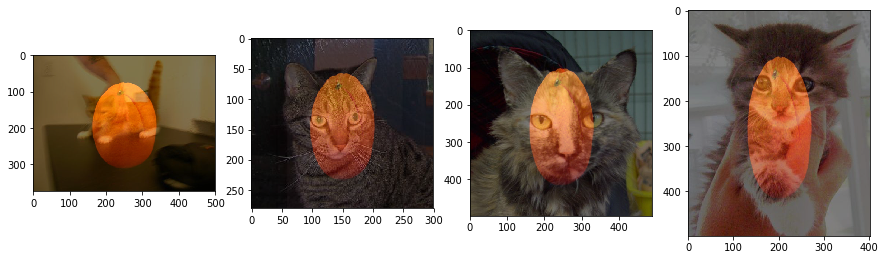

In [6]:
"""
As we can see, weighted sum operation makes it easier to test whether
our decomposition is good enough.
"""

# Reshape the orange img
# Weighted sum orange to the cat images
oranged_kitty_weighted0 = cv2.addWeighted(orange_resized0, 0.5, cat0, 0.5, 0)
oranged_kitty_weighted1 = cv2.addWeighted(orange_resized1, 0.5, cat1, 0.5, 0)
oranged_kitty_weighted2 = cv2.addWeighted(orange_resized2, 0.5, cat2, 0.5, 0)
oranged_kitty_weighted3 = cv2.addWeighted(orange_resized3, 0.5, cat3, 0.5, 0)

f, axarr = plt.subplots(1,4)
f.set_size_inches(15, 10)
axarr[0].imshow(cv2.cvtColor(oranged_kitty_weighted0, cv2.COLOR_BGR2RGB))
axarr[1].imshow(cv2.cvtColor(oranged_kitty_weighted1, cv2.COLOR_BGR2RGB))
axarr[2].imshow(cv2.cvtColor(oranged_kitty_weighted2, cv2.COLOR_BGR2RGB))
axarr[3].imshow(cv2.cvtColor(oranged_kitty_weighted3, cv2.COLOR_BGR2RGB))

plt.show()

In [7]:
"""
As for the problem of layer weights, and the model accuracy;
the problem might be easily solved if we randomize the weights
when creating the traning data, since this might solve the
overfitting to weights.

But in order to do so, we need to store the information of
weights in addition to the blended images.

We should create datasets for both same weight approach, and
random weight approach.
"""

# Create random weights for each cat img
random_weights = np.around(np.random.uniform(low=0.3, high=0.7, size=(len(cat_img_paths))), decimals=2)
random_weights.tofile(weights_path)

# Create both same weight dataset, and random weight dataset at the same time
for idx, img_path in enumerate(cat_img_paths):
    kitty = cv2.imread(img_path)
    height, width, channels = kitty.shape
    orange_resized = cv2.resize(orange, dsize=(width, height), interpolation=cv2.INTER_CUBIC)
    orangedkitty = cv2.addWeighted(orange_resized, 0.5, kitty, 0.5, 0)
    orangedkitty_random = cv2.addWeighted(orange_resized, 1 - random_weights[idx], kitty, random_weights[idx], 0)
    cv2.imwrite(orangedkitty_path + 'kitty%s.jpg'%idx, orangedkitty)
    cv2.imwrite(orangedkitty_random_path + 'kitty%s.jpg'%idx, orangedkitty_random)
    